In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from sklearn.model_selection import train_test_split

In [4]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

print(f'Shape of Train dataset: {train.shape}')
print(f'Shape of Test dataset: {test.shape}')

Shape of Train dataset: (42000, 785)
Shape of Test dataset: (28000, 784)


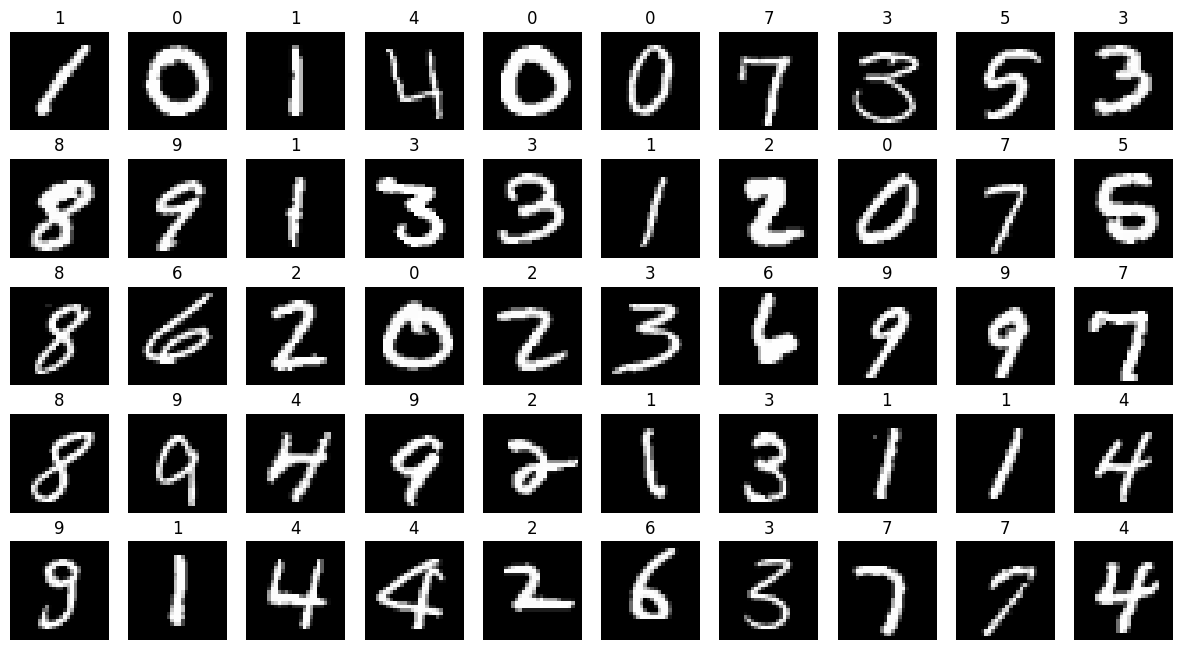

In [5]:
fig, ax = plt.subplots(5, 10, figsize=(15, 8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    img = train.iloc[i, 1:].values
    img = img.reshape((28, 28))
    plt.imshow(img, cmap='gray')
    plt.title(train.iloc[i, 0])
    plt.axis('off')
plt.show()

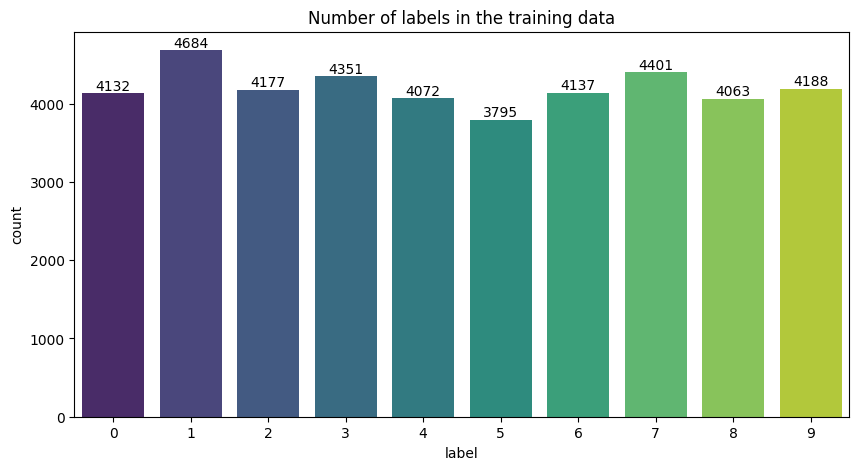

In [6]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="label", data=train, palette="viridis")
plt.title('Number of labels in the training data')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d'%int(p.get_height()), 
            fontsize=10, color='black', ha='center', va='bottom')
plt.show()

In [5]:
X = train.drop('label', axis=1)
X = X / 255.0
X = X.values.reshape(-1, 28, 28, 1)

y = train['label']
number_of_classes = len(y.unique()) # 10

X_test = test / 255.0
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=1, shuffle=True)
print(f"Number of data train: {X_train.shape}")
print(f"Number of data val: {X_val.shape}")
print(f"Number of data test: {X_test.shape}")

Number of data train: (33600, 28, 28, 1)
Number of data val: (8400, 28, 28, 1)
Number of data test: (28000, 28, 28, 1)


In [17]:
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.RandomRotation(factor=0.15),
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=2),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dropout(0.25),
    layers.Dense(256, activation='relu'),
    layers.Dense(number_of_classes, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_rotation                 │ (None, 28, 28, 1)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,165,002 (4.44 MB)

 Trainable params: 1,165,002 (4.44 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
LR = 0.001
opt = keras.optimizers.Adam(learning_rate=LR)

val_not_improved = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode="max", start_from_epoch=3)
val_reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.66, patience=2, mode="max", cooldown=3, min_lr=1e-7)

In [22]:
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=64, callbacks=[val_not_improved, val_reduce_lr], validation_data=(X_val, y_val))

Epoch 1/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 142s 266ms/step - accuracy: 0.7636 - loss: 0.6940 - val_accuracy: 0.9720 - val_loss: 0.0963 - learning_rate: 0.0010
Epoch 2/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 144s 269ms/step - accuracy: 0.9645 - loss: 0.1156 - val_accuracy: 0.9757 - val_loss: 0.0810 - learning_rate: 0.0010
Epoch 3/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 141s 268ms/step - accuracy: 0.9755 - loss: 0.0792 - val_accuracy: 0.9849 - val_loss: 0.0530 - learning_rate: 0.0010
Epoch 4/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 142s 269ms/step - accuracy: 0.9776 - loss: 0.0721 - val_accuracy: 0.9825 - val_loss: 0.0606 - learning_rate: 0.0010
Epoch 5/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 142s 270ms/step - accuracy: 0.9812 - loss: 0.0624 - val_accuracy: 0.9850 - val_loss: 0.0509 - learning_rate: 0.0010
Epoch 6/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 141s 268ms/step - accuracy: 0.9826 - loss: 0.0562 - val_accuracy: 0.9829 - val_loss: 0.0584 - learning_rate: 0.0010
Epoch 7/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 142s 268ms/step - accura

In [8]:
def plot_history(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(len(acc))

    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    # Plot loss and validation loss on the first subplot
    axes[0].plot(epochs, loss)
    axes[0].plot(epochs, val_loss)
    axes[0].set_title('Loss and Validation Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')

    # Plot accuracy and validation binary accuracy on the second subplot
    axes[1].plot(epochs, acc)
    axes[1].plot(epochs, val_acc)
    axes[1].set_title('Accuracy and Validation Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    plt.tight_layout()
    plt.show()

    print(("Best Validation Loss: {:0.4f}" +\
          "\nBest Validation Accuracy: {:0.4f}")\
          .format(min(val_loss), max(val_acc)))

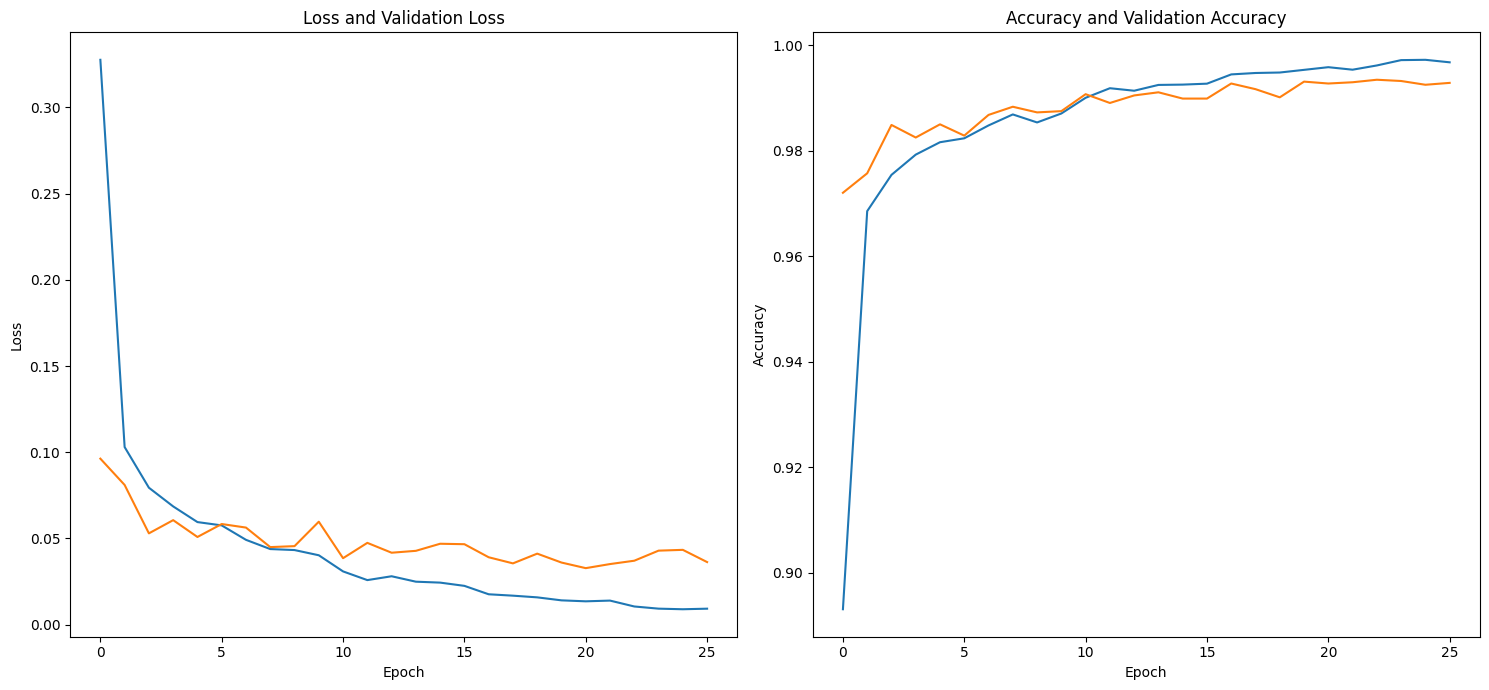

Best Validation Loss: 0.0328
Best Validation Accuracy: 0.9935


In [23]:
plot_history(history.history)

In [26]:
saved_weights = '/kaggle/working/simpleDR.weights.h5'
model.save_weights(saved_weights)

In [43]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions,axis = 1)
predictions = pd.Series(predictions,name = "Label")

875/875 ━━━━━━━━━━━━━━━━━━━━ 32s 36ms/step


In [47]:
submission['Label'] = predictions
submission.to_csv("submission.csv", index = False)